In [1]:
import gym
import gym_pdw

import numpy as np
from matplotlib import pyplot as plt

In [2]:
env = gym.make('gym_pdw:pdw-v0')

In [3]:
# Epsilon-greedy action selection
def select_action(epsilon, state, Q):
    if np.random.uniform(0,1) < epsilon:
        action = env.random_action()
    else:
        action = np.argmax(Q[:,state[0],state[1]])
    return action

In [4]:
# Q function update 
def update(state, action, reward, next_state, next_action, E, Q):
    error = reward + gamma*Q[next_action][next_state[0],next_state[1]] - Q[action][state[0],state[1]]
    Q = Q + alpha*error*E
    
    return Q

In [5]:
def SARSA_lambda(gamma, alpha, epsilon, episodes, lambda_val):
    
    # Set the goal variant
    goal_pos = env.set_goal('A')

    # Setting terminal action-state value 
    Terminal_state = goal_pos

    # Initializing Q function values to zero
    Q = np.zeros([env.action_space.n, env.observation_space.shape[0], env.observation_space.shape[1]])

        
    steps = np.zeros([episodes])
    avg_reward = np.zeros([episodes])
    
    for episode in range(episodes):

        env.reset()
        
        curr_state = env.get_state()
        action = env.random_action()
        
#         print(curr_state ,"init====================")

        E = np.zeros([env.action_space.n, env.observation_space.shape[0], env.observation_space.shape[1]])

        while True:
            
            if steps[episode] != 0:
                action = select_action(epsilon, curr_state, Q)
            
            next_state, reward = env.step(action)
            next_action = select_action(epsilon, next_state, Q)

            # Update eligibility traces
            E *= gamma*lambda_val
            E[action][curr_state[0],curr_state[1]] += 1
            
            # Update Q values
            Q = update(curr_state, action, reward, next_state, next_action, E, Q)
            
            
            steps[episode] +=1
            avg_reward[episode] = avg_reward[episode] + (reward - avg_reward[episode])/steps[episode]
            
            
            curr_state = next_state
#             print(curr_state, "curr_state", env.start_positions)

            if curr_state == goal_pos:
                print("yes", steps[episode])
                break
    
    return avg_reward, steps, Q

In [6]:
def plot_sarsa_lambda(avg_reward, steps, episodes):
    '''
    Gets the data for all curves and plots them in one graph
    '''

    
    # Figure instances will be returned.
    fig1=plt.figure(figsize=(10,6)).add_subplot(111)
    fig2=plt.figure(figsize=(10,6)).add_subplot(111)

    # colors for different values of epsilon
    colors = ['g', 'r', 'k', 'b', 'y','m', 'c']

    fig1.plot(range(episodes), avg_reward, colors[0], label = " Average reward " )
    fig2.plot(range(episodes), steps, colors[1], label = " Steps")

    # Labelling the plot
    fig1.title.set_text('SARSA avg reward')
    fig1.set_ylabel('Average Reward')
    fig1.set_xlabel('episodes')
    fig1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

    # Labelling the plot
    fig2.title.set_text('SARSA num steps')
    fig2.set_ylabel('Steps')
    fig2.set_xlabel('episodes')
    fig2.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

    # Display the plot
#     plt.show()


In [7]:
def plot_compare(avg_reward_all, steps_all, lambda_vals):
    
    # Figure instances will be returned.
    fig1=plt.figure(figsize=(10,6)).add_subplot(111)
    fig2=plt.figure(figsize=(10,6)).add_subplot(111)

    # colors for different values of c
    colors = ['k', 'r', 'g', 'm', 'y','k', 'c']

    # For each value of c, plot the average reward vs steps
    for i in range(len(avg_reward_all)):
        fig1.plot(range(episodes), steps_all[i], colors[i], label = "lambda = " + str(lambda_vals[i]) )
    
    # For each c, plot the % times optimal arm selected vs steps
    for i in range(len(steps_all)):
        fig2.plot(range(episodes), steps_all[i], colors[i], label = "lambda = " + str(lambda_vals[i]) )
    
    # Labelling the  plot
    fig1.title.set_text('For all lambdas Average reward vs episodes')
    fig1.set_ylabel('Average Reward')
    fig1.set_xlabel('episodes')
    fig1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    
    # Labelling the plot
    fig2.title.set_text('For all lambdas steps vs episodes')
    fig2.set_ylabel('Steps')
    fig2.set_xlabel('episodes')
    fig2.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

    # Display the plot
    plt.show()



yes 52.0
yes 193.0
yes 49.0
yes 656.0
yes 520.0
yes 1007.0
yes 628.0
yes 42.0
yes 538.0
yes 174.0
yes 787.0
yes 792.0
yes 104.0
yes 204.0
yes 698.0
yes 288.0
yes 1490.0
yes 779.0
yes 335.0
yes 39.0
yes 294.0
yes 1494.0
yes 367.0
yes 361.0
yes 894.0
yes 728.0
yes 159.0
yes 227.0
yes 82.0
yes 966.0
yes 45.0
yes 741.0
yes 301.0
yes 1007.0
yes 495.0
yes 222.0
yes 760.0
yes 164.0
yes 67.0
yes 261.0
yes 318.0
yes 489.0
yes 277.0
yes 557.0
yes 473.0
yes 115.0
yes 429.0
yes 104.0
yes 28.0
yes 754.0
yes 990.0
yes 237.0
yes 233.0
yes 120.0
yes 299.0
yes 573.0
yes 652.0
yes 306.0
yes 436.0
yes 45.0
yes 567.0
yes 581.0
yes 236.0
yes 97.0
yes 176.0
yes 392.0
yes 1043.0
yes 396.0
yes 224.0
yes 171.0
yes 148.0
yes 147.0
yes 343.0
yes 101.0
yes 679.0
yes 286.0
yes 303.0
yes 190.0
yes 309.0
yes 68.0
yes 631.0
yes 215.0
yes 92.0
yes 368.0
yes 752.0
yes 116.0
yes 1127.0
yes 109.0
yes 457.0
yes 581.0
yes 198.0
yes 189.0
yes 36.0
yes 681.0
yes 301.0
yes 504.0
yes 146.0
yes 636.0
yes 314.0
yes 444.0
yes 723

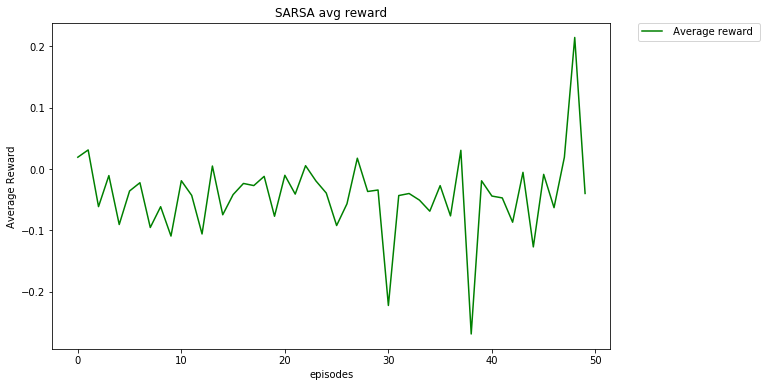

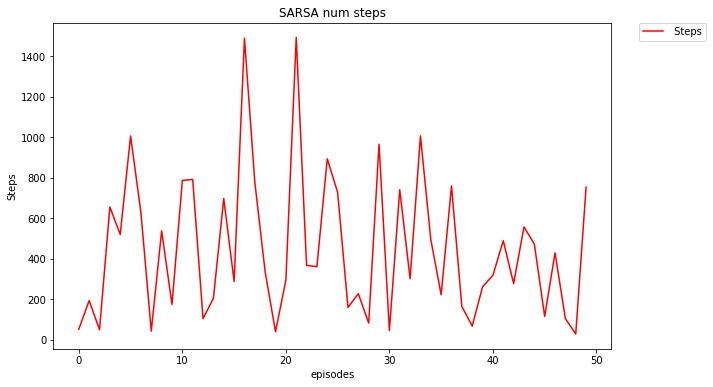

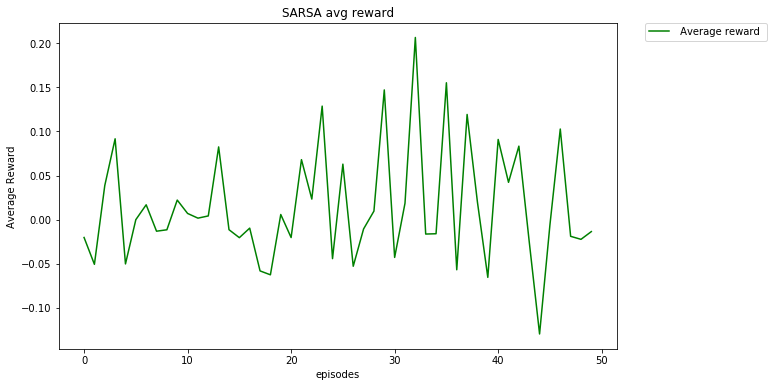

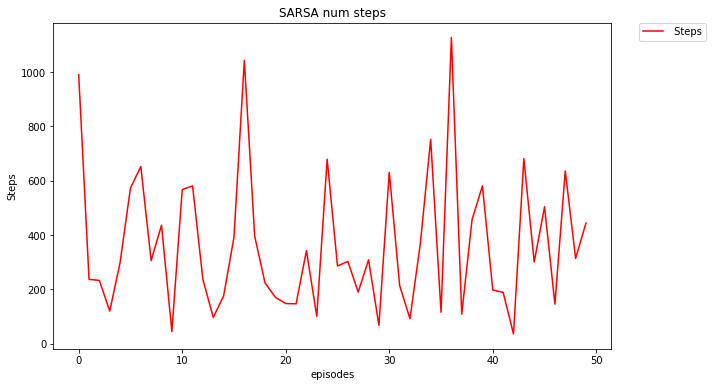

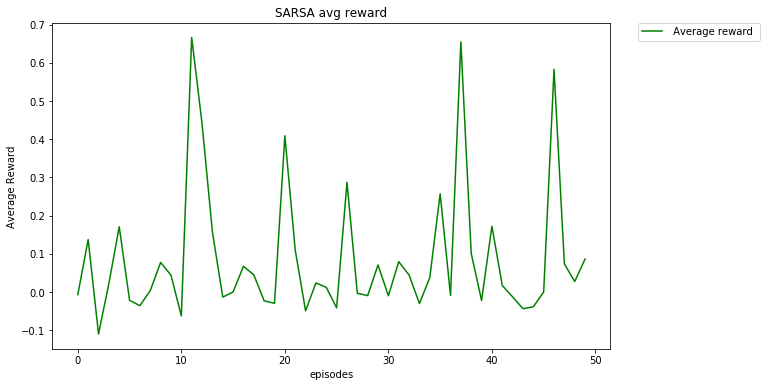

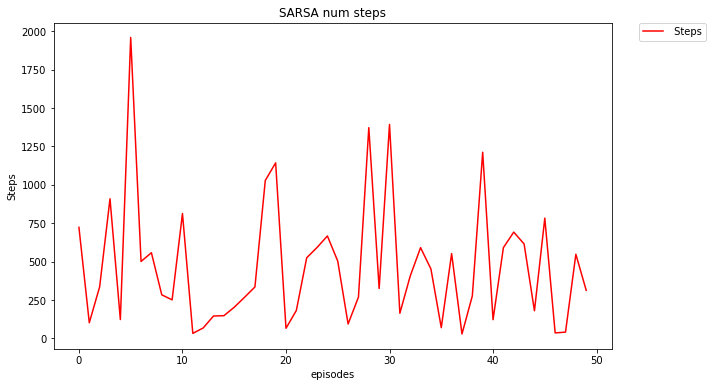

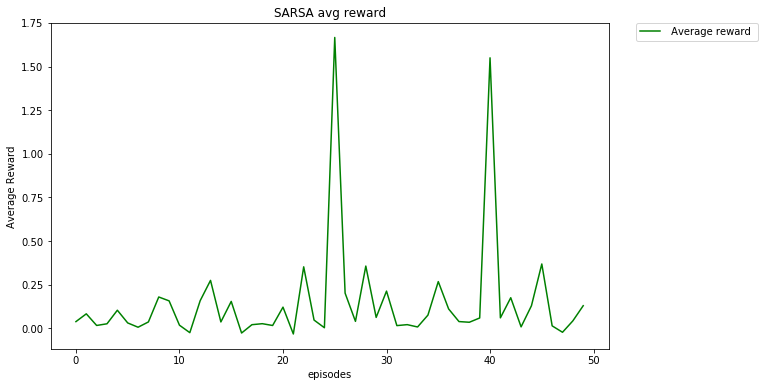

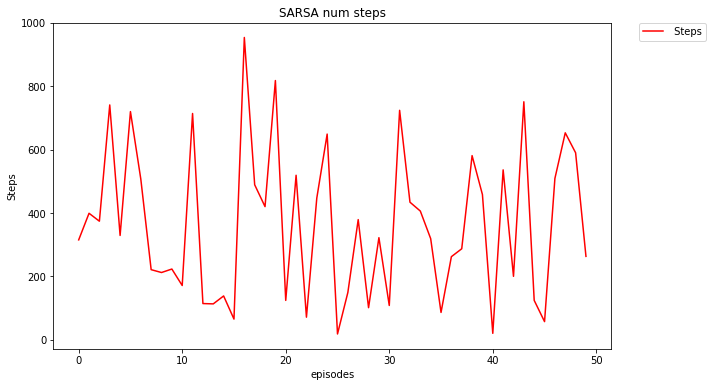

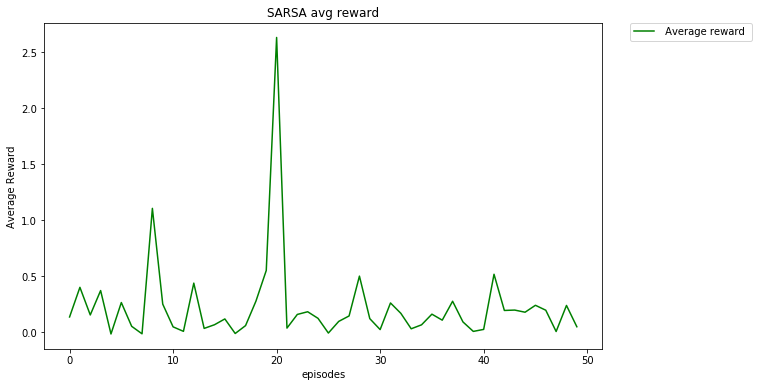

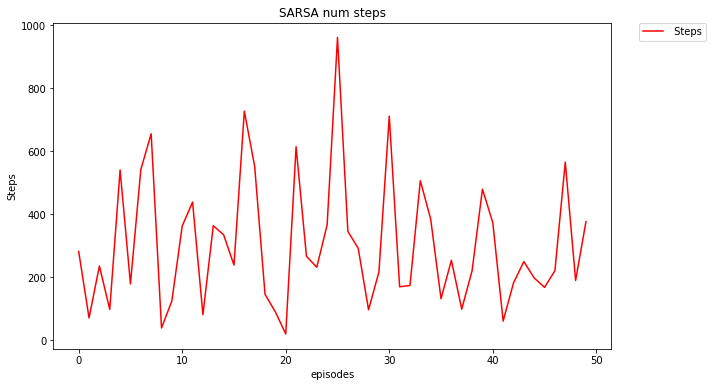

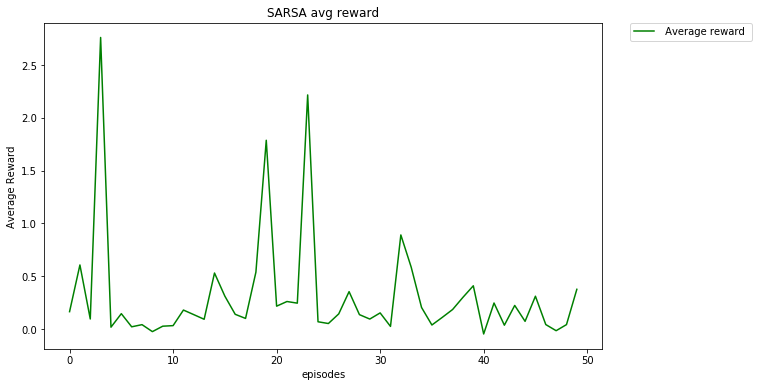

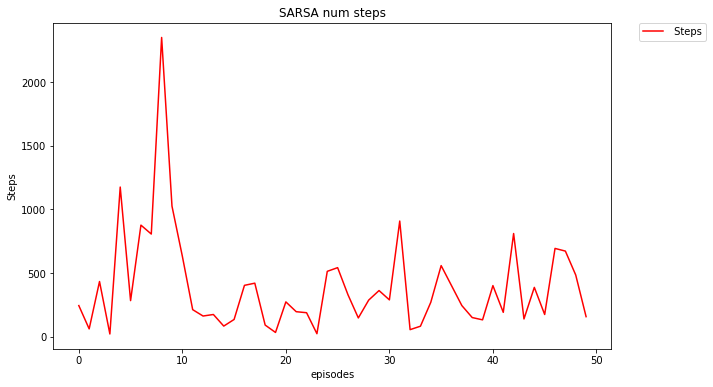

In [8]:
if __name__=='__main__':
    # parameters
    gamma = 0.9
    alpha = 0.01
    epsilon = 0.1
    episodes = 50
    
    lambda_vals = [0, 0.3, 0.5, 0.9, 0.99, 1.0]
    
    avg_reward_all = []
    steps_all = []
    
    Q_all = []
    
    for i in range(len(lambda_vals)):
        avg_reward, steps, Q = SARSA_lambda(gamma,alpha,epsilon, episodes, lambda_vals[i])
        
        Q_all.append(Q)
        
        avg_reward_all.append(avg_reward)
        steps_all.append(steps)
        
        plot_sarsa_lambda(avg_reward_all[i], steps_all[i], episodes)
    plt.show
    

In [ ]:
# To display the policy learn't
plt.rcParams['figure.figsize'] = [8,8]
print(len(Q_all))
fig, ax = plt.subplots()

for k in range(len(Q_all)):
    for i in range(12):
        for j in range(12):
            
            ax.matshow(np.argmax(Q_all[k], axis=0))
            c = int(np.argmax(Q_all[k], axis=0)[j,i])
            direcs = {0:'↑', 1:'➜', 2:'←', 3:'↓' }
            ax.text(i, j, direcs[c], va='center', ha='center')
            

6


ERROR:root:Invalid alias: The name clear can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name more can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name less can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name man can't be aliased because it is another magic command.
